# Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,plot_roc_curve

# Load Dataset

In [4]:
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
#checking the first five rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
#checking the last five rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
#picking 4 random samples
df.sample(4)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
562,ham,Geeeee ... I love you so much I can barely sta...,NaN,NaN,NaN
3916,ham,Eh ur laptop got no stock lei... He say mon mu...,NaN,NaN,NaN
2857,ham,In life when you face choices Just toss a coin...,NaN,NaN,NaN
2371,ham,"Hmm, too many of them unfortunately... Pics ob...",NaN,NaN,NaN


In [8]:
#checking the data shape
df.shape

(5572, 5)

In [9]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
#Checking null values
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

from the above we can see there are null values

# Data Cleaning(Updating Null Values)

In [14]:
#lets drop these unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [15]:
#lets view the first five rows
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
#lets view the number of columns and number of rows
df.shape

(5572, 2)

# Encoding

In [18]:
#Label encoding
#label spam mail as 0,ham mail as 1;

df.loc[df['v1'] == 'spam', 'v1',]=0
df.loc[df['v1'] == 'ham', 'v1',]=1

In [19]:
#lets view the first five rows again
df.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
#seperating the data as text and labels

x = df['v2']
y = df['v1']

In [21]:
# lets view the text features
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [22]:
#lets view the labels
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object

In [23]:
# lets seperate the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
#lets view the number of rows of the feature texts below
print(x.shape)
print(x_test.shape)
print(x_train.shape)

(5572,)
(1115,)
(4457,)


In [25]:
# Feature extraction
# transform the text data to feature vectors used to feed into logistic regression model

feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase='True')
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

# convert y train and ytest values as integers

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [26]:
print(x_train)

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: v2, Length: 4457, dtype: object


In [27]:
#Training the machine learning model

model = LogisticRegression()

In [28]:
#Training the logistic regression model
model.fit(x_train_features,y_train)

LogisticRegression()

In [29]:
#Model evaluation

prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train,prediction_on_training_data)

In [30]:
#Lets see the training accuracy
print('accuracy on training data:',accuracy_on_training_data)

accuracy on training data: 0.9699349338119811


In [31]:
#lets perform prediction and evaluate its accuracy
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test,prediction_on_test_data)

In [32]:
#lets see the testing accuracy
print('accuracy on test data:',accuracy_on_test_data)

accuracy on test data: 0.9560538116591928


In [33]:
#lets get new data and do some predictions
input_mail = [" i tire for you oo"]
input_data_features = feature_extraction.transform(input_mail)

In [34]:
#making predictions

predictions = model.predict(input_data_features)
print(predictions)

if predictions[0] ==1:
    print('This is ham mail')
    
else:
    print('This is a spam mail')

[1]
This is ham mail


1    4825
0     747
Name: v1, dtype: int64


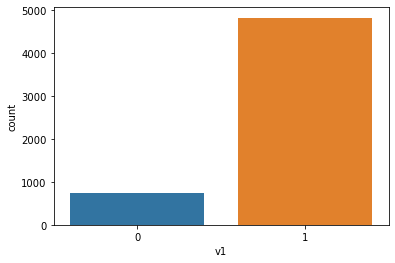

In [35]:
import seaborn as sns
#Lets visualize data distribution amongst the new Binary classes
ax=sns.countplot(x='v1',data=df)
print(df['v1'].value_counts())

In [36]:
#usig naive bayes model
#using neural networks called multi layer perceptron

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [37]:
#lets initiate the models
nb_model = GaussianNB()
nn_model = MLPClassifier()

In [38]:
#lets train the mlp model
nn_model.fit(x_train_features,y_train)

MLPClassifier()

In [39]:
#Model evaluation

prediction_on_training_data = nn_model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train,prediction_on_training_data)

In [40]:
print('accuracy on training data:',accuracy_on_training_data)

accuracy on training data: 1.0


In [41]:
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test,prediction_on_test_data)

In [42]:
print('accuracy on test data:',accuracy_on_test_data)

accuracy on test data: 0.9560538116591928


In [43]:
#lets get new data
input_mail = [" i am tired of this whole process"]
input_data_features = feature_extraction.transform(input_mail)

In [44]:
#making predictions

predictions = model.predict(input_data_features)
print(predictions)

if predictions[0] ==1:
    print('This is ham mail')
    
else:
    print('This is a spam mail')

[1]
This is ham mail


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


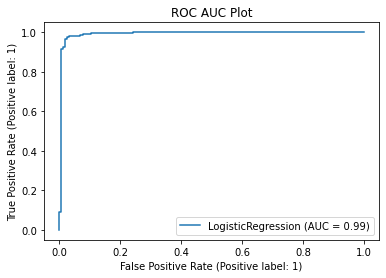

In [45]:
#plotting roc curve for logistic regression model
plot_roc_curve(model,x_test_features,y_test)
plt.title("ROC AUC Plot")
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


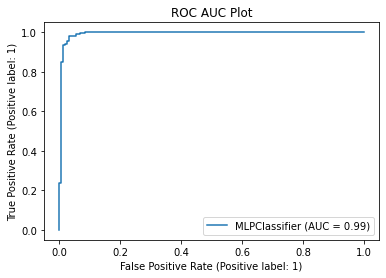

In [46]:
#plotting roc curve for neural network model
plot_roc_curve(nn_model,x_test_features,y_test)
plt.title("ROC AUC Plot")
plt.show()